In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

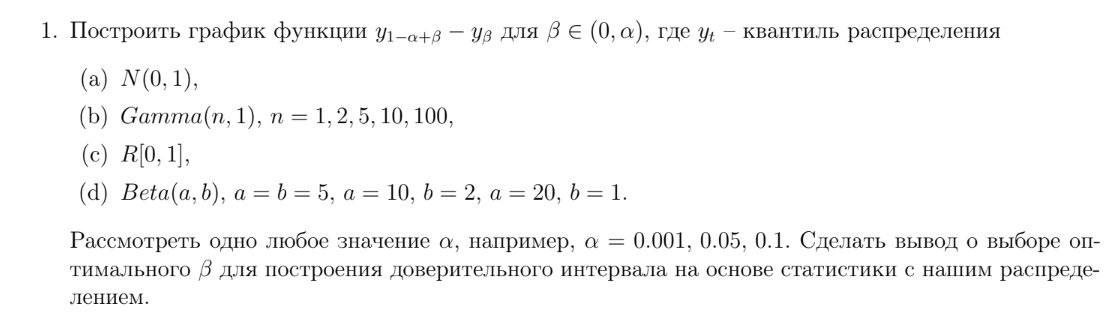

In [5]:
alpha = 0.05

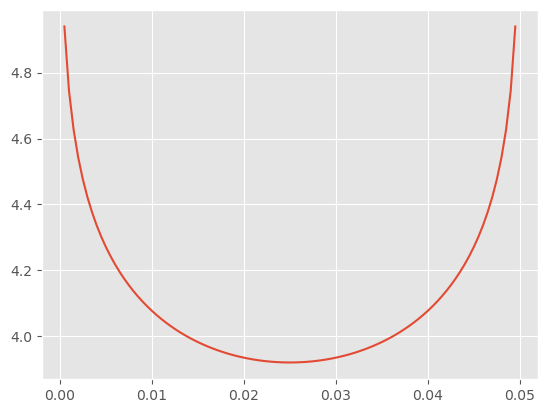

In [6]:
#a)
B = np.arange(0, alpha, alpha/100)
Y = [sc.stats.norm.ppf(1-alpha+b) - sc.stats.norm.ppf(b) for b in B]

plt.plot(B, Y)

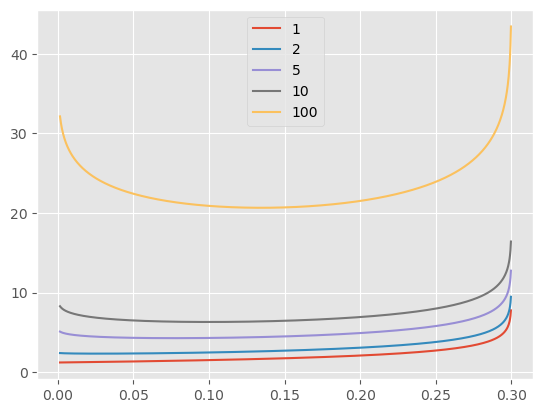

In [15]:
#b)
B = np.arange(0+5*alpha/1000, alpha, alpha/1000)

N = [1, 2, 5, 10, 100]
i = 1
for n in N:
    Y = [sc.stats.gamma.ppf(1-alpha+b, n) -
      sc.stats.gamma.ppf(b, n) for b in B]
    plt.plot(B, Y, label=str(n))
    
plt.legend(loc='best')

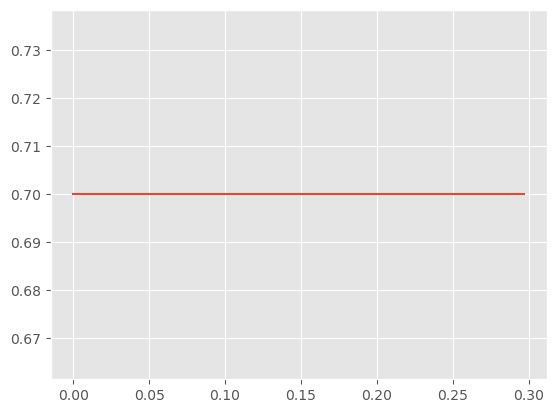

In [17]:
#c)
B = np.arange(0, alpha, alpha/100)
Y = [sc.stats.uniform.ppf(1-alpha+b) - sc.stats.uniform.ppf(b) for b in B]

plt.plot(B, Y)

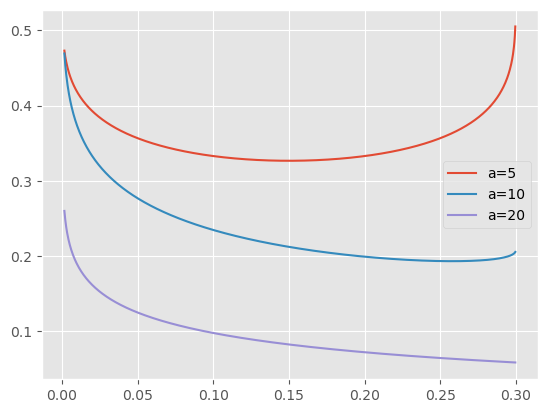

In [22]:
#d)
params = [[5, 5], [10, 2], [20, 1]]
B = np.arange(5*alpha/1000, alpha, alpha/1000)

for p in params:
    Y = [sc.stats.beta.ppf(1-alpha+b, p[0], p[1]) 
         - sc.stats.beta.ppf(b, p[0], p[1]) for b in B]
    plt.plot(B, Y, label= 'a=' + str(p[0]))
    
plt.legend(loc='best')

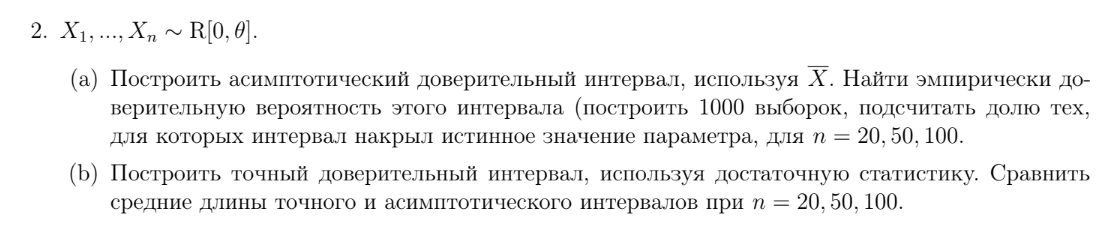

In [2]:
N = [20, 50, 100]
a = 0.05
t = float(input("Значение параметра: "))

Значение параметра:  1


In [6]:
def as_confidence(x, a):
    mean = np.mean(x)
    z_a = sc.stats.norm.ppf(1-a/2)
    z_b = sc.stats.norm.ppf(a/2)
    lower = (2*mean * (1 - 1/(3*n)**0.5 * z_a))
    upper = (2*mean * (1 - 1/(3*n)**0.5 * z_b))
    return [lower, upper]

def exact_confidence(x, a, n):
    mx = np.max(x)
    lower = mx
    upper = mx/(a**(1/n))
    return [lower, upper]

In [8]:
#a)
for n in N:
    count = 0
    for i in range(1000):
        x = np.random.uniform(0, t, n)
        as_bounds = as_confidence(x, a)
        if t >= as_bounds[0] and t <= as_bounds[1]:
            count += 1
    print(n, "доля:", count/1000)

20 доля: 0.946
50 доля: 0.95
100 доля: 0.95


In [62]:
#b)
length_1 = 0
length_2 = 0
for n in N:
    for i in range(1000):
        x = np.random.uniform(0, t, n)
        exact_bounds = exact_confidence(x, a, n)
        as_bounds = as_confidence(x, a)
        length_1 += exact_bounds[1] - exact_bounds[0]
        length_2 += as_bounds[1] - as_bounds[0]
    length_1 /= 1000
    length_2 /= 1000
    print('-------')
    print(n)
    print("Точный:", length_1)
    print("Асимптотический:", length_2)

-------
20
Точный: 0.15383781996000875
Асимптотический: 0.5065506545253361
-------
50
Точный: 0.060698098007860676
Асимптотический: 0.3199628115581755
-------
100
Точный: 0.03016647770705516
Асимптотический: 0.22671558368034542


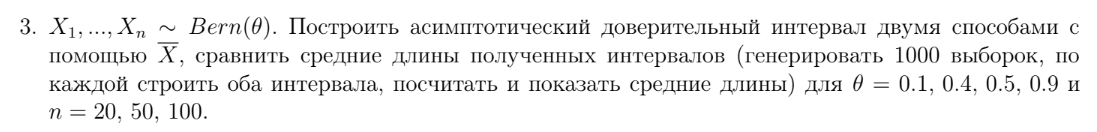

In [1]:
def as_conf_1(x, a):
    mean = np.mean(x)
    z_a = sc.stats.norm.ppf(1-a/2)
    z_b = sc.stats.norm.ppf(a/2)
    lower = mean - z_a * (mean*(1-mean)/n)**0.5
    upper = mean - z_b * (mean*(1-mean)/n)**0.5
    if lower < 0: 
        lower = 0
    if upper > 1:
        upper = 1
        
    return [lower, upper]

def as_conf_2(x, a):
    mean = np.mean(x)
    z_a = sc.stats.norm.ppf(1-a/2)
    z_b = sc.stats.norm.ppf(a/2)
    lower = np.sin(np.arcsin(mean**0.5) - z_a/(2*(n**0.5)))**2 
    upper = np.sin(np.arcsin(mean**0.5) - z_b/(2*(n**0.5)))**2
    if lower < 0: 
        lower = 0
    if upper > 1:
        upper = 1
        
    return [lower, upper]

In [6]:
T = [0.1, 0.4, 0.5, 0.9]
N = [20, 50, 100]

a = 0.05

for t in T:
    print('- - -')
    print('   ', t)
    for n in N:
        length_1 = 0
        length_2 = 0
        for i in range(1000):
            x = np.random.binomial(1, t, n)
            bounds_1 = as_conf_1(x, a)
            bounds_2 = as_conf_2(x, a)
            length_1 += bounds_1[1] - bounds_1[0]
            length_2 += bounds_2[1] - bounds_2[0]
            
        print('------')
        print(n)
        print("Метод 1:", length_1/1000)
        print("Метод 2:", length_2/1000)

- - -
    0.1
------
20
Метод 1: 0.2091211487089672
Метод 2: 0.2236865101141804
------
50
Метод 1: 0.1568999081725754
Метод 2: 0.1576102506092649
------
100
Метод 1: 0.11717759531014661
Метод 2: 0.11644587612421135
- - -
    0.4
------
20
Метод 1: 0.41633424064867464
Метод 2: 0.4033626575482561
------
50
Метод 1: 0.2686058670366504
Метод 2: 0.2651795941845474
------
100
Метод 1: 0.19085310359777644
Метод 2: 0.1896335245403352
- - -
    0.5
------
20
Метод 1: 0.4263134967383878
Метод 2: 0.4128397973640049
------
50
Метод 1: 0.27442335611891433
Метод 2: 0.2709228767532673
------
100
Метод 1: 0.19505150313393466
Метод 2: 0.19380509569355214
- - -
    0.9
------
20
Метод 1: 0.20877422964342518
Метод 2: 0.22370151496299678
------
50
Метод 1: 0.158895797493993
Метод 2: 0.1592968423854346
------
100
Метод 1: 0.11554380092379148
Метод 2: 0.11483958459194861


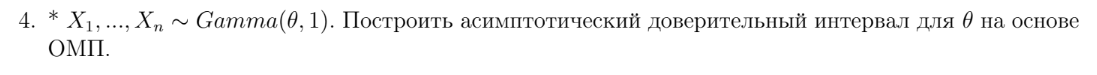

In [2]:
def likelihood(t, sample):
    ans = 1
    for i in range(len(sample)):
        ans += np.log(
            sc.stats.gamma.pdf(sample[i], t, scale=1)
        )
    return ans

def mle(sample, orig):
    ans = sc.optimize.fmin(lambda t: -likelihood(t, sample), orig, disp=False)
    return float(ans)

In [12]:
#Информация фишера = digamma(thetta) => асимптотическая дисперсия 1/digamma(thetta)
#Для построения требуется состоятельная оценка. 
def as_conf(x, t, a):
    ml = mle(x, t)
    z_a = sc.stats.norm.ppf(1-a/2)
    z_b = sc.stats.norm.ppf(a/2)
    
    lower = ml - z_a/(np.abs(sc.special.digamma(ml))**0.5) * (1/n**0.5)
    upper = ml - z_b/(np.abs(sc.special.digamma(ml))**0.5) * (1/n**0.5)
    
    if(lower > upper):
        tmp = lower
        lower = upper
        upper = tmp
        
    if(lower < 0):
        lower = 0
        
    return [lower, upper]

N = [10]
a = 0.05
t = float(input("Значение параметра: "))
for n in N:
    count = 0
    for i in range(1000):
        x = sc.stats.gamma.rvs(t, scale=1, size=n)
        conf = as_conf(x, t, a)
        if t >= conf[0] and t <= conf[1]:
            count += 1
            
    print(n, count)

Значение параметра:  1


10 100
100 100
